In [13]:
import os
import math 
import sys
sys.path.append("..")
import numpy as np
from utils import *

In [5]:
(((np.pi/2.0)**5 * 420.257/180)**(1/4) )*10

21.73754324524274

## Question -1 

In [7]:
a = 0 ; b = 1 ; N_mid = 289 ; N_sim = 20
a = 0 ; b = np.pi/2.0  ; N_mid = 610 ; N_sim = 22

def f1(x):
    return 1.0/x
def f2(x):
    return x * np.cos(x)

In [9]:
def sim_1_third(f,a,b,N):
    h = (b-a)/N
    int_sum = 0.0
    x = a
    for i in range(N+1):
        if i == 0 or i == N :
            int_sum += f(x)
        elif i % 2 == 0 :
            int_sum += 2.0 * f(x)
        elif i % 2 == 1 :
            int_sum += 4.0 * f(x)
        x += h 
    return h/3.0 * int_sum


In [16]:
Midpoint(f1,289,1,2)

0.6931468064035278

In [18]:
0.6931468064035278 - 0.69314718

-3.7359647220291947e-07

In [19]:
sim_1_third(f1,1,2,20)

0.6931473746651159

In [20]:
0.6931473746651159 - 0.69314718

1.9466511591570423e-07

In [23]:
Midpoint(f2,610,0,np.pi/2.0)

0.5707970370864707

In [24]:
0.5707970370864707 - (np.pi/2.0 - 1)

7.102915741130644e-07

In [25]:
sim_1_third(f2,0,np.pi/2.0,22)

0.5707969873166873

In [26]:
0.5707969873166873 - (np.pi/2.0 - 1)

6.605217907074135e-07

## Question-2

In [27]:
n_random = LCG(100000)

(array([3997., 3991., 4005., 4001., 4013., 4027., 4003., 3995., 4008.,
        3983., 3974., 4003., 4015., 4004., 3995., 3990., 4023., 4001.,
        3988., 3989., 4000., 3989., 4007., 3997., 4002.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

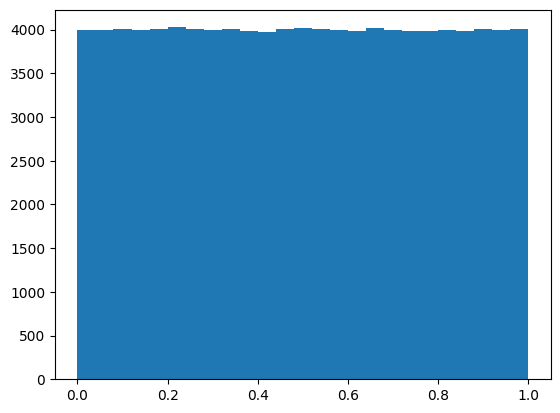

In [29]:
import matplotlib.pyplot as plt
plt.hist(n_random,bins = 25 , range = (0,1))

In [30]:
def int_monte_carlo(f,a,b,random_gen,N):
    n_random_uni = random_gen(N)
    rand_a_b = [a+(b-a)*item for item in n_random_uni]
    f_x_list = [f(x) for x in rand_a_b]
    int_value = (b-a)/N * sum(f_x_list)
    sigma = np.sqrt(1.0/N * sum([item**2 for item in f_x_list]) - (1/N * sum(f_x_list))**2.0)
    return int_value , sigma

In [31]:
def f3(x):
    return np.sin(x)**2

In [38]:
n_sample = []
FN_values = []
sigma_value = []
for item in range(10,35000,100):
    n_sample.append(item)
    int_value , sigma = int_monte_carlo(f3,-1,1,LCG,item)
    FN_values.append(int_value)
    sigma_value.append(sigma)
    

In [39]:
len(n_sample)

350

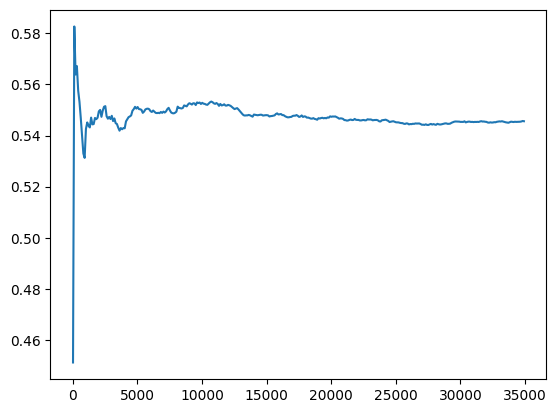

In [40]:
plt.plot(n_sample,FN_values)

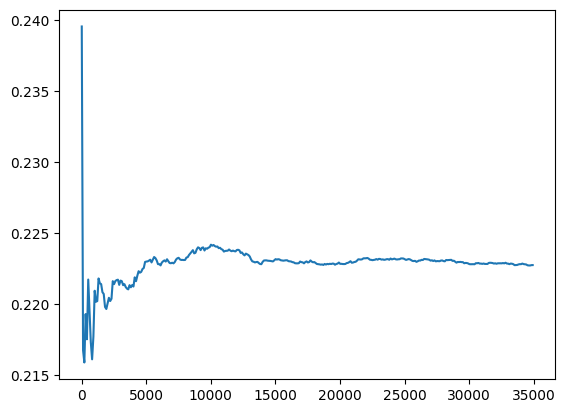

In [41]:
plt.plot(n_sample,sigma_value)

In [42]:
FN_values[-1]

0.5455901562971492